In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

A graph of 3 nodes:
0:[1]
1:[0]
2:[]

Nodes: [0, 1, 2]
Edges: [(0, 1)]


C:\Users\CJ Benincasa\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


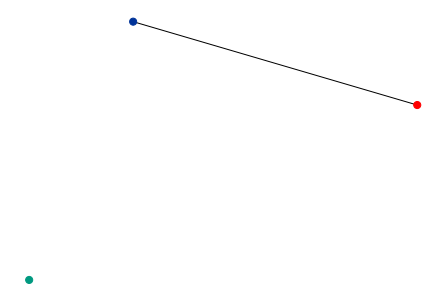

In [2]:
class Graph():
    def __init__(self):
        self.gdict = {}
        self.values = {}
        
    def add_node(self,node,val=None):
        
        if node not in self.gdict:
            self.gdict[node] = []
            self.values[node] = val
    
    def add_edge(self,node1,node2):
        self.add_node(node1)
        self.add_node(node2)
        
        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
    def delete_node(self,doomed_node):
        for other_node in self.gdict[doomed_node]:
            self.gdict[other_node].remove(doomed_node)
        del self.gdict[doomed_node]
        del self.values[doomed_node]
        
    def delete_edge(self, node1, node2):
        if node1 not in self.gdict[node2]: return
        self.gdict[node1].remove(node2)
        self.gdict[node2].remove(node1)

    def get_nodes(self):
        return list(self.gdict.keys())
    def get_edges(self):
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if link>node:
                    out.append((node,link)) 
        return out
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
    def plot(self):
        RED = (1,0,0)
        BLUE = (0,0.2,0.6)
        GREEN = (0,0.6,0.5)
        GREY = (.5,.5,.5)
        g_nx = nx.Graph()
        nodes = self.get_nodes()
        g_nx.add_nodes_from(nodes)
        g_nx.add_edges_from(self.get_edges())
        colors = []
        for i in range(len(nodes)):
            if self.values[nodes[i]] is not None:
                if self.values[nodes[i]][0]=='healthy':
                    colors.append(BLUE)
                elif self.values[nodes[i]][0]=='infected':
                    colors.append(RED)
                elif self.values[nodes[i]][0]=='vaccinated':
                    colors.append(GREY)
                else:
                    colors.append(GREEN)
            else:
                colors.append(BLUE)
        nx.draw_kamada_kawai(g_nx, node_size=50, node_color=colors)
g = Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.delete_edge(0,2)
print(g)
print('Nodes:',g.get_nodes())
print('Edges:',g.get_edges())
g.values[0] = ['infected', None]
g.values[2] = ['immune', None]
g.plot()

In [3]:
def degrees(g):
    degrees = []
    for node,links in g.gdict.items():
        degrees.append(len(links))
    #print(degrees)
    hist = np.zeros(max(degrees)+1)
    for degree in degrees:
        hist[degree] += 1
    #print(hist)
    plt.plot(hist,'.-');
    plt.xlabel('Degrees')
    plt.ylabel('Frequency')
    return hist

In [4]:
#def random_network(n_nodes=7):
#    n_edges = n_nodes
#
#    g = Graph()
#    for i in range(n_nodes):
#        g.add_node(i)
#    edges = []
#    while len(edges)<n_edges:
#        n1 = np.random.randint(low=0, high=n_nodes)
#        n2 = np.random.randint(low=0, high=n_nodes)
#        if n2<n1:
#            n1,n2 = n2,n1
#
#        if (n1,n2) not in edges and n1!=n2:
#            g.add_edge(n1,n2)
#            edges.append((n1,n2))
#    return g
    
#print(g)

#g = random_network(100)
#plt.figure(figsize=(12,4))
#plt.subplot(121)
#g.plot()
#plt.subplot(122)
#degrees_random = degrees(g);

In [5]:
#def rich_club_network(n_nodes=7):
#    g = Graph()
#    for i in range(n_nodes):
#        if i==0:
#            g.add_node(0)
#        else:
#            g.add_edge(i, np.random.randint(low=0, high=i))
#    return g
#
#g = rich_club_network(100)
#plt.figure(figsize=(12,4))
#plt.subplot(121)
#g.plot()
#plt.subplot(122)
#degrees(g)
#plt.plot(degrees_random);
#plt.legend(['Rich club','Random network']);

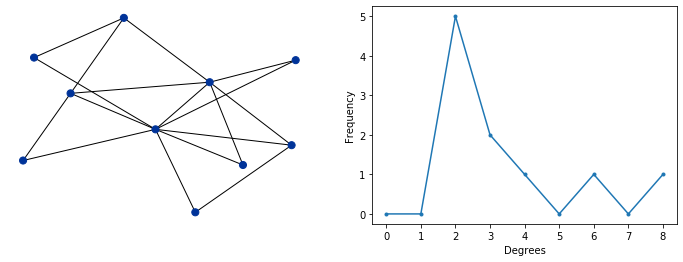

In [6]:
def barabasi(n_nodes=7):
    g = Graph()
    degrees = np.zeros(n_nodes)
    nodes = np.array(range(n_nodes))
    for i in range(n_nodes):
        if i==0:
            g.add_node(0)
        elif i==1:
            g.add_edge(1,0)
            degrees[0] = 1
            degrees[1] = 1
        else:
            connections = np.random.choice(nodes[:i], size =2, replace =False, p=degrees[:i]/np.sum(degrees))
            for node in connections:
                g.add_edge(i,node)
                degrees[node] += 1
            degrees[i]=2
        #print(i,'Nodes:',nodes,'Degrees:',degrees)
    return g

g = barabasi(10)
plt.figure(figsize=(12,4))
plt.subplot(121)
g.plot()
plt.subplot(122)
degrees(g);

array([ 0.,  0., 20., 13.,  4.,  5.,  3.,  2.,  0.,  2.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])

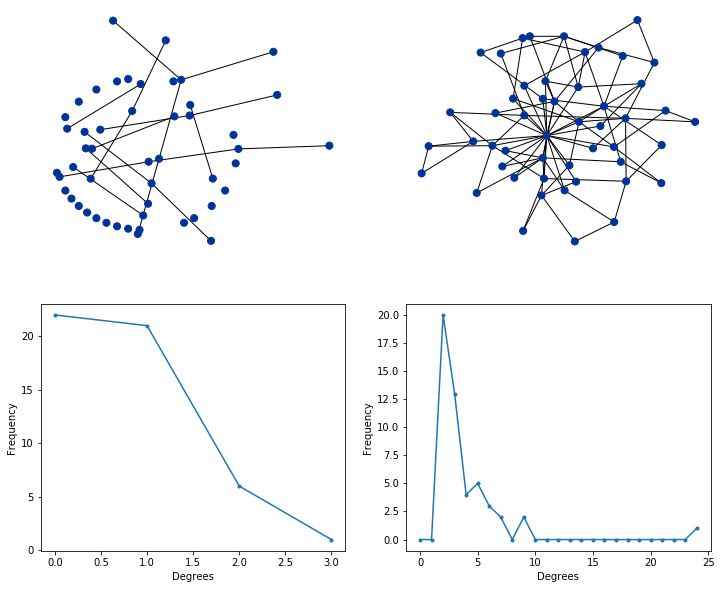

In [7]:
g = barabasi(200)
doomed_nodes = np.random.choice(range(200),150 ,replace =False)
for node in doomed_nodes:
    g.delete_node(node)
plt.figure(figsize = (12,10))
plt.subplot(221)
g.plot()
plt.subplot(223)
degrees(g)
plt.subplot(222)
g = barabasi(50)
g.plot()
plt.subplot(224)
degrees(g)

In [8]:
def measure_assortativity(g):
    count = 0
    edges = g.get_edges()
    for edge in edges:
        if g.values[edge[0]][0] == g.values[edge[1]][0]:
            count += 1
    return count/len(edges)

TypeError: 'NoneType' object is not subscriptable

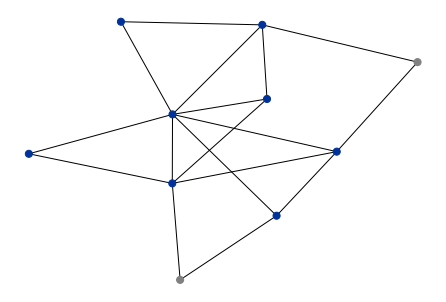

In [9]:
def vaccinate(g, vax_rate=0,preference = 1):
    nodes = g.get_nodes()
    n_to_vaccinate = int(len(nodes)*vax_rate)
    prob={}
    for node in nodes:
        prob[node] = 1
       
    for i in range (n_to_vaccinate):
        p = []
        for node in nodes:
            p.append(prob[node])
            
        target_node = np.random.choice(nodes,p=p/np.sum(p))
        g.values[node]  = ['vaccinated',0]
        for friend in g.gdict[target_node]:
            prob[friend] *= preference
        nodes.remove(target_node)
    for node in nodes:
        g.values[node] = ['healthy', 0] 
    #for node in nodes:
    #    if np.random.uniform()<vax_rate:
    #        g.values[node] = ['vaccinated', 0]       # Vaccinated
    #   else:
    #       g.values[node] = ['healthy', 0]      # Succeptible
g = barabasi(10)
vaccinate(g,vax_rate=.5)
g.plot()
print(measure_assortativity(g))

In [10]:

def pandemic(g, prob=0.5, nsteps=10, infect_period=1, vax_rate=0, reinitialize=True):
    """Runs the pandemic for several steps."""
    nodes = g.get_nodes()
    if reinitialize:
        vaccinate(g,vax_rate)
        patient_zero = np.random.randint(low=0, high=len(nodes))
        g.values[patient_zero] = ['infected', 0]  # Only one node is sick

    history = np.zeros(nsteps)
    for t in range(nsteps):
        newly_infected = []
        is_active = False
        for node in nodes:
            if g.values[node][0] == 'infected':         # If the node is infectious
                is_active = True
                if g.values[node][1] == infect_period:
                    g.values[node][0] = 'immune'
                else:
                    g.values[node][1] += 1                  # One more day since the infection
                    neighbors = g.gdict[node]
                    for neighbor in neighbors:
                        if g.values[neighbor][0]=='healthy' and np.random.uniform()<prob:
                            newly_infected.append(neighbor)
        if not is_active:
            return history
        for node in newly_infected:
            g.values[node] = ['infected', 0]
        history[t] = len(newly_infected)
    return history
g = barabasi(20)
plt.figure(figsize = (12,6))
for i in range(8):
    if i == 0:
        pandemic(g, prob=0.5,nsteps = 1, infect_period = 1, vax_rate = .1)
    else:
        pandemic(g, prob=0.5,nsteps = 1, infect_period = 1, reinitialize= False)
    plt.subplot(2,4,i+1)
    g.plot()
    plt.title(i)


TypeError: 'NoneType' object is not subscriptable

<Figure size 864x432 with 0 Axes>

In [ ]:
#N_NODES = 100
#N_STEPS = 30
#N_TRIALS = 100
#infection_rate = 0.5
#rn = random_network(N_NODES)
#rcn = rich_club_network(N_NODES)

#rcnh = np.zeros(shape = (N_STEPS,N_TRIALS))
#for i in range(N_TRIALS): 
#    rcnh[:,i] = pandemic(rcn, prob =infection_rate,nsteps = N_STEPS)
    
#rnh = np.zeros(shape = (N_STEPS,N_TRIALS))
#for i in range(N_TRIALS): 
#    rnh[:,i] = pandemic(rn, prob = infection_rate,nsteps = N_STEPS)

#plt.figure(figsize = (12,4))
#plt.subplot(121)
#plt.plot(np.mean(rnh, axis=1))
#plt.legend(['RN Average Infection Rate'],loc=1)
#plt.subplot(122)
#plt.plot(np.mean(rcnh, axis=1))
#plt.legend(['RCN Average Infection Rate'], loc=1)

In [ ]:
#N_STEPS = 30
#N_TRIALS = 100

#history = np.zeros(shape = (N_STEPS,N_TRIALS))
#for i in range(N_TRIALS): 
#    g = rich_club_network(20)
#    history[:,i] = pandemic(g, prob = 0.5,nsteps = 30)

#plt.plot(np.mean(history,axis=1))
#plt.xlabel('Day')
#plt.ylabel('New Cases')

In [ ]:
#def remove_hub(g):
#    highest_so_far = 0
#    best_node = None
#    for node,links in g.gdict.items():
#        if len(links)> highest_so_far:
#            highest_so_far = len(links)
#            best_node = node
#    #print(best_node, g.gdict[best_node])
#    for node in g.gdict[best_node].copy():
#        g.delete_edge(best_node, node)
#g = barabasi(10)
#plt.subplot(121)
#g.plot()
#remove_hub(g)
#plt.subplot(122)
#g.plot()

In [ ]:
#N_STEPS = 30
#N_TRIALS = 500
#n_steps = 100
#PROB = .2
#history = np.zeros(shape = (N_STEPS,N_TRIALS*2))
#for i in range(N_TRIALS): 
#    g = barabasi(n_steps)
#    history[:,i] = pandemic(g, prob = PROB,nsteps = N_STEPS)
#    remove_hub(g)
#    history[:,i+N_TRIALS] = pandemic(g, prob = PROB,nsteps = N_STEPS)
#
#plt.plot(np.mean(history[:,:N_TRIALS],axis=1),label = 'Barabasi')
#plt.plot(np.mean(history[:,N_TRIALS:],axis=1),label = 'Trimmed')
#plt.xlabel('Day')
#plt.ylabel('New Cases')
#plt.legend(loc = 'upper right')

In [ ]:
N_STEPS = 20
N_NODES = 1000
PROB = 0.2      # Propagation probability: no longer a constant!
N_PARAM_STEPS = 10  # Prob will take this many values, in equal steps, from 1/n to 1 (inclusive).
INFECT_PERIOD =2
N_TRIALS = 100     # For each combination of parameters

history = np.zeros(shape=(N_STEPS, N_TRIALS*N_PRARAM_STEPS))
total_infected = np.zeros(shape=(N_TRIALS, N_PRARAM_STEPS))
vax_rate = np.zeros(N_PRARAM_STEPS)
for iparam in range(N_PRARAM_STEPS):
    vax_rate[iparam] = (iparam)/N_PRARAM_STEPS
    for itrial in range(N_TRIALS):
        g = barabasi(N_NODES)
        history[:, itrial+iparam*N_TRIALS] = pandemic(g, prob=PROB, 
                                                     nsteps=N_STEPS, infect_period=INFECT_PERIOD, 
                                                     vax_rate = vax_rate[iparam])
        count_infected = 0
        for node, val in g.values.items():
            if val[0]=='immune' or val[0]=='infected':
                count_infected += 1
        total_infected[itrial, iparam] = count_infected
plt.figure(figsize=(12,5))
plt.subplot(121)
for iparam in range(N_PARAM_STEPS):
    plt.plot(np.mean(history[:, (N_TRIALS*iparam):(N_TRIALS*(iparam+1))],axis=1), label=vax_rate[iparam]);
plt.xlabel('Day');
plt.ylabel('N new cases');
plt.legend(loc='upper right');

plt.subplot(122)
plt.plot(vax_rate, np.average(total_infected, axis=0)/N_NODES, '-', color='dodgerblue');
plt.errorbar(vax_rate, np.average(total_infected, axis=0)/N_NODES, 
             yerr=np.std(total_infected, axis=0)/N_NODES, fmt='.', capsize=5,
             ecolor='dodgerblue', markerfacecolor='k');
plt.xlabel('Daily probability of contagion');
plt.ylabel('Share of pupulation affected');
plt.ylim(0,1);